## Yamnet model for sound classification

In [1]:
# Upgrade pip first. Also make sure wheel is installed.
!python -m pip install --upgrade pip wheel


     |████████████████████████████████| 1.5MB 6.1MB/s 
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.35.1)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
# Install dependences.
!pip install numpy resampy tensorflow soundfile


In [3]:
# Clone TensorFlow models repo into a 'models' directory.
!git clone https://github.com/tensorflow/models.git
%cd models/research/audioset/yamnet


Cloning into 'models'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 47678 (delta 17), reused 41 (delta 3), pack-reused 47623
Receiving objects: 100% (47678/47678), 551.89 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (32819/32819), done.
/content/models/research/audioset/yamnet


In [4]:
# Download data file into same directory as code.
!curl -O https://storage.googleapis.com/audioset/yamnet.h5

# Download audio for testing
!curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

!ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.5M  100 14.5M    0     0  30.2M      0 --:--:-- --:--:-- --:--:-- 30.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  153k  100  153k    0     0  1602k      0 --:--:-- --:--:-- --:--:-- 1602k
total 15296
-rw-r--r-- 1 root root     7816 Nov 25 04:39 export.py
-rw-r--r-- 1 root root     7490 Nov 25 04:39 features.py
-rw-r--r-- 1 root root     2307 Nov 25 04:39 inference.py
-rw-r--r-- 1 root root     1847 Nov 25 04:39 params.py
-rw-r--r-- 1 root root     5012 Nov 25 04:39 README.md
-rw-r--r-- 1 root root   157484 Nov 25 04:39 speech_whistling2.wav
-rw-r--r-- 1 root root    14096 Nov 25 04:39 yamnet_class_map.csv
-rw-r--r-- 1 root root 15296092 Nov 25 04:39 yamnet.h5
-rw-r--r-- 1 root root     5549 Nov 25 04:39 y

In [6]:
# Imports.
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt

import params as yamnet_params
import yamnet as yamnet_model
import tensorflow as tf

import pandas as pd
from IPython.display import Audio, Javascript
from scipy.io import wavfile

In [7]:
print(tf.__version__)

2.3.0


In [ ]:
# Installation ready, let's test it.
!python yamnet_test.py
# If we see "Ran 4 tests ... OK ...", then we're all set.

In [9]:
# Read info for csv file
csv_file = pd.read_csv('/content/models/research/audioset/yamnet/yamnet_class_map.csv')
csv_file.head()
print(csv_file)

     index         mid                display_name
0        0    /m/09x0r                      Speech
1        1    /m/0ytgt  Child speech, kid speaking
2        2   /m/01h8n0                Conversation
3        3   /m/02qldy        Narration, monologue
4        4   /m/0261r1                    Babbling
..     ...         ...                         ...
516    516  /m/07p_0gm                   Throbbing
517    517   /m/01jwx6                   Vibration
518    518    /m/07c52                  Television
519    519    /m/06bz3                       Radio
520    520   /m/07hvw1             Field recording

[521 rows x 3 columns]


In [10]:
# Conversion of your wav file to desired format
# Upload one rundom wav file to /content/
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Yamnet/soloupis.wav' -acodec pcm_s16le -ac 1 -ar 16000 '/content/models/research/audioset/yamnet/generated_output.wav'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [11]:
!ls -l

total 15364
-rw-r--r-- 1 root root     7816 Nov 25 04:39 export.py
-rw-r--r-- 1 root root     7490 Nov 25 04:39 features.py
-rw-r--r-- 1 root root    64078 Nov 25 04:42 generated_output.wav
-rw-r--r-- 1 root root     2307 Nov 25 04:39 inference.py
-rw-r--r-- 1 root root     1847 Nov 25 04:39 params.py
drwxr-xr-x 2 root root     4096 Nov 25 04:39 __pycache__
-rw-r--r-- 1 root root     5012 Nov 25 04:39 README.md
-rw-r--r-- 1 root root   157484 Nov 25 04:39 speech_whistling2.wav
-rw-r--r-- 1 root root    14096 Nov 25 04:39 yamnet_class_map.csv
-rw-r--r-- 1 root root 15296092 Nov 25 04:39 yamnet.h5
-rw-r--r-- 1 root root     5549 Nov 25 04:39 yamnet.py
-rw-r--r-- 1 root root     2564 Nov 25 04:39 yamnet_test.py
-rw-r--r-- 1 root root   140293 Nov 25 04:39 yamnet_visualization.ipynb


In [12]:
# Listen to audio
wav_file_name = '/content/models/research/audioset/yamnet/generated_output.wav'

# Loading audio samples from the wav file:
sample_rate, audio_samples = wavfile.read(wav_file_name, 'rb')

# Show some basic information about the audio.
duration = len(audio_samples)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(audio_samples)}')

print(audio_samples[-100:-1])
print(audio_samples.shape)

Audio(wav_file_name)

Sample rate: 16000 Hz
Total duration: 2.00s
Size of the input: 32000
[-582 -649 -670 -696 -656 -656 -603 -502 -428 -442 -469 -562 -629 -683
 -790 -770 -743 -623 -542 -469 -408 -402 -428 -529 -649 -710 -770 -770
 -770 -696 -596 -455 -348 -254 -107    0   73  167  294  422  482  596
  703  757  810  864  877  884  897  884  877  911  891  857  790  763
  683  623  589  556  502  495  522  495  495  549  536  536  542  556
  569  609  656  623  589  596  562  489  469  475  415  428  448  408
  428  408  388  341  328  314  301  314  314  308  375  388  542  609
  743]
(32000,)


In [13]:
# Read in the audio.

wav_data, sr = sf.read(wav_file_name, dtype=np.int16)
waveform = wav_data / 32768.0  #transform to [-1 to +1]

In [14]:
# The graph is designed for a sampling rate of 16 kHz, but higher rates should work too.
# We also generate scores at a 10 Hz frame rate.
params = yamnet_params.Params(sample_rate=sr, patch_hop_seconds=0.1)
print("Sample rate =", params.sample_rate)

Sample rate = 16000


In [27]:
# Set up the YAMNet model.
class_names = yamnet_model.class_names('/content/models/research/audioset/yamnet/yamnet_class_map.csv')
print(class_names)
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('/content/models/research/audioset/yamnet/yamnet.h5')

['Speech' 'Child speech, kid speaking' 'Conversation'
 'Narration, monologue' 'Babbling' 'Speech synthesizer' 'Shout' 'Bellow'
 'Whoop' 'Yell' 'Children shouting' 'Screaming' 'Whispering' 'Laughter'
 'Baby laughter' 'Giggle' 'Snicker' 'Belly laugh' 'Chuckle, chortle'
 'Crying, sobbing' 'Baby cry, infant cry' 'Whimper' 'Wail, moan' 'Sigh'
 'Singing' 'Choir' 'Yodeling' 'Chant' 'Mantra' 'Child singing'
 'Synthetic singing' 'Rapping' 'Humming' 'Groan' 'Grunt' 'Whistling'
 'Breathing' 'Wheeze' 'Snoring' 'Gasp' 'Pant' 'Snort' 'Cough'
 'Throat clearing' 'Sneeze' 'Sniff' 'Run' 'Shuffle' 'Walk, footsteps'
 'Chewing, mastication' 'Biting' 'Gargling' 'Stomach rumble'
 'Burping, eructation' 'Hiccup' 'Fart' 'Hands' 'Finger snapping'
 'Clapping' 'Heart sounds, heartbeat' 'Heart murmur' 'Cheering' 'Applause'
 'Chatter' 'Crowd' 'Hubbub, speech noise, speech babble'
 'Children playing' 'Animal' 'Domestic animals, pets' 'Dog' 'Bark' 'Yip'
 'Howl' 'Bow-wow' 'Growling' 'Whimper (dog)' 'Cat' 'Purr' 'Meow' 

In [16]:
# Run the model.
scores, embeddings, spectrogram = yamnet(waveform)
scores = scores.numpy()
spectrogram = spectrogram.numpy()

print(scores.shape)
print(scores)
print(embeddings.shape)
print(embeddings)

(12, 521)
[[9.7081220e-01 1.8748641e-04 5.4842234e-04 ... 1.9329786e-04
  9.0929866e-04 5.0445614e-08]
 [9.4894147e-01 2.2768974e-04 8.1795454e-04 ... 6.3276291e-04
  2.7909577e-03 1.4915863e-06]
 [9.6230936e-01 1.7648935e-04 1.9702017e-03 ... 2.1749735e-04
  1.0442436e-03 9.0059658e-08]
 ...
 [9.4782150e-01 5.9539343e-05 4.2188168e-04 ... 3.6907470e-06
  6.9925452e-05 3.0353753e-10]
 [9.8517311e-01 1.3744355e-05 2.3567677e-04 ... 3.4099603e-06
  9.4039002e-05 4.1033471e-10]
 [9.6049786e-01 1.7577420e-05 6.9123507e-04 ... 3.1909819e-06
  9.2063710e-05 1.0552633e-09]]
(12, 1024)
tf.Tensor(
[[0.         0.07951134 0.11088535 ... 0.         0.         0.        ]
 [0.         0.20358181 0.06721428 ... 0.         0.         0.        ]
 [0.         0.13199522 0.16712375 ... 0.13762192 0.         0.        ]
 ...
 [0.04927183 0.         0.         ... 0.00974074 0.         0.        ]
 [0.02341837 0.25227138 0.08382676 ... 0.         0.         0.        ]
 [0.0441341  0.40566638 0.40371493

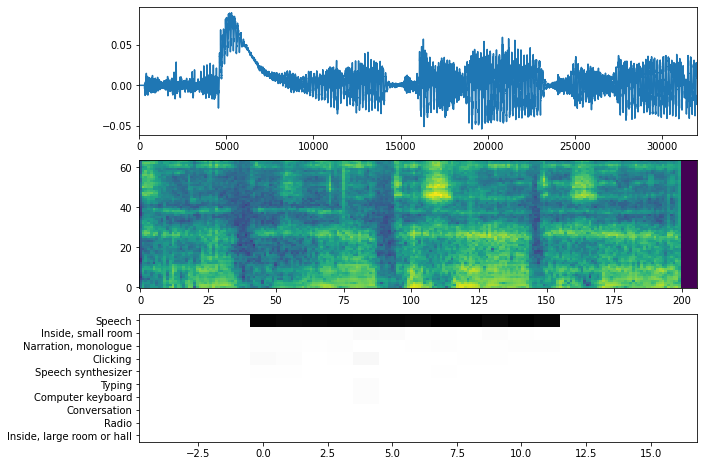

In [17]:
# Visualize the results.
plt.figure(figsize=(10, 8))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])
# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest', origin='bottom')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_N = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
plt.subplot(3, 1, 3)
plt.imshow(scores[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')
# Compensate for the patch_window_seconds (0.96s) context window to align with spectrogram.
patch_padding = (params.patch_window_seconds / 2) / params.patch_hop_seconds
plt.xlim([-patch_padding, scores.shape[0] + patch_padding])
# Label the top_N classes.
yticks = range(0, top_N, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_N, 0]))

### Inference with the pyhton script


In [18]:
# Or you can do inference with python script
!python inference.py generated_output.wav

2020-11-25 04:44:05.415151: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-25 04:44:07.139709: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-25 04:44:07.149345: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-11-25 04:44:07.149402: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (87143e4b01a2): /proc/driver/nvidia/version does not exist
2020-11-25 04:44:07.156653: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2300000000 Hz
2020-11-25 04:44:07.156919: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5cf08c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-11-25 04:44:07.156961: I tensorflow/com

### Inference with tflite

In [19]:
#print the last 100 values of array
print(waveform[-100:-1])

[-0.01776123 -0.01980591 -0.02044678 -0.02124023 -0.02001953 -0.02001953
 -0.0184021  -0.01531982 -0.01306152 -0.01348877 -0.01431274 -0.01715088
 -0.01919556 -0.02084351 -0.02410889 -0.02349854 -0.02267456 -0.01901245
 -0.01654053 -0.01431274 -0.01245117 -0.01226807 -0.01306152 -0.0161438
 -0.01980591 -0.02166748 -0.02349854 -0.02349854 -0.02349854 -0.02124023
 -0.01818848 -0.0138855  -0.01062012 -0.00775146 -0.00326538  0.
  0.00222778  0.00509644  0.00897217  0.01287842  0.01470947  0.01818848
  0.02145386  0.02310181  0.02471924  0.02636719  0.02676392  0.02697754
  0.02737427  0.02697754  0.02676392  0.02780151  0.02719116  0.02615356
  0.02410889  0.02328491  0.02084351  0.01901245  0.01797485  0.01696777
  0.01531982  0.0151062   0.01593018  0.0151062   0.0151062   0.01675415
  0.01635742  0.01635742  0.01654053  0.01696777  0.0173645   0.01858521
  0.02001953  0.01901245  0.01797485  0.01818848  0.01715088  0.0149231
  0.01431274  0.01449585  0.01266479  0.01306152  0.01367188 

In [20]:
interpreter = tf.lite.Interpreter('/content/drive/MyDrive/Colab Notebooks/Yamnet/model_yamnet_tflite.tflite')

#input_details = interpreter.get_output_details()
print(interpreter.get_input_details())
print(interpreter.get_output_details())
#print(interpreter.get_tensor_details())

[{'name': 'waveform', 'index': 0, 'shape': array([1], dtype=int32), 'shape_signature': array([-1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 203, 'shape': array([  1, 521], dtype=int32), 'shape_signature': array([ -1, 521], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 201, 'shape': array([   1, 1024], dtype=int32), 'shape_signature': array([  -1, 1024], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 

In [21]:
print(waveform.shape)

(32000,)


In [25]:
# Load the TFLite model and allocate tensors.
input_shape_size = waveform.shape[0]
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Colab Notebooks/Yamnet/model_yamnet_tflite.tflite")

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

input_data = np.array(waveform, dtype=np.float32)
interpreter.resize_tensor_input(input_details[0]['index'], [input_shape_size], strict=True)
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

scores, embeddings, spectrogram = (
    interpreter.get_tensor(output_details[0]['index']),
    interpreter.get_tensor(output_details[1]['index']),
    interpreter.get_tensor(output_details[2]['index']))
print(scores.shape, embeddings.shape, spectrogram.shape)  # (N, 521) (N, 1024) (M, 64)
print(scores)



(4, 521) (4, 1024) (240, 64)
[[9.7081292e-01 1.8748641e-04 5.4845214e-04 ... 1.9323826e-04
  9.0929866e-04 5.0443113e-08]
 [9.7168410e-01 2.1752715e-04 6.6351891e-04 ... 2.3698953e-05
  2.2223592e-04 3.2318709e-08]
 [9.6315944e-01 6.7842877e-05 5.4571033e-04 ... 2.8924642e-06
  6.2684237e-05 3.1446096e-10]
 [7.9695344e-01 1.4767051e-04 6.1607361e-04 ... 5.5602193e-04
  5.8847666e-04 1.4094614e-07]]


In [29]:
#calculate the mean
mean_scores = np.mean(scores, axis=0)
print(mean_scores)
print(len(mean_scores))
top_N = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
print(top_class_indices)

[9.25652444e-01 1.55131740e-04 5.93438745e-04 5.84061444e-03
 4.10865830e-09 1.96025521e-03 3.29951508e-05 5.29784757e-07
 1.78876016e-05 2.58807358e-08 4.44307542e-11 7.91262380e-07
 2.35633357e-04 4.30519394e-05 2.88389512e-09 2.83455819e-07
 1.83763962e-06 3.16607185e-09 1.22224028e-05 1.02256554e-05
 7.69400344e-07 6.33762647e-06 7.31984073e-09 8.74935040e-07
 5.64824586e-05 6.04343131e-06 8.00617173e-09 7.25562641e-05
 8.66224873e-05 3.63120807e-06 1.95233824e-07 2.25871318e-05
 5.45149703e-08 5.21329139e-06 3.75495759e-08 1.46338732e-06
 3.10108153e-05 1.86701751e-10 2.70482087e-06 6.59030150e-07
 9.65026947e-10 9.67109983e-08 5.95999126e-08 1.24352288e-08
 2.11547217e-07 2.04584110e-11 3.36740122e-05 7.18739628e-08
 6.00502653e-06 1.08376444e-05 2.69757606e-07 1.89818792e-08
 2.78967782e-08 6.38144184e-06 7.60753096e-08 1.07622220e-07
 1.96254473e-06 2.34702853e-08 8.82931488e-08 8.34177797e-07
 2.75551546e-08 2.11445965e-07 5.92725939e-07 1.84081628e-07
 3.05431195e-06 2.289330

In [24]:
for i in top_class_indices:
  print(class_names[i])

Speech
Inside, small room
Clicking
Narration, monologue
Speech synthesizer
Inside, large room or hall
Typing
Conversation
Computer keyboard
Radio
